In [1]:
import numpy as np


print("Numpy version:", np.__version__)

Numpy version: 2.1.0


In [2]:
# !pip install pymc arviz #may need to install#
# !pip install "numpy<2.0" # check numpy version for compatability with pymc/pytensor, can throw error
# !pip install --force-reinstall pymc arviz

import pymc as pm # library for bayesian model
import arviz as az

print("Numpy version:", np.__version__)
print("PyMC version:", pm.__version__)

Numpy version: 2.1.0
PyMC version: 5.26.1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "particle_data.csv"
df = pd.read_csv(file_path)

display(df)

,source,DOI,Authors,Year,Species,Life Stage,In vitro/in vivo,Sex,Experiment Type,Exposure Route,...,Sodium Azide Present?,Screened for Chemical Contamination?,Particle Cleaning?,Solvent Rinse,Background Contamination Monitored?,Concentration Validated?,Particle Behavior,Uptake Validated?,Tissue Distribution,Organisms Fed?
0,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
1,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
2,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
3,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
4,search,10.1007/s12013-015-0705-6,Barshtein,2016,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1104,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1105,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y
1106,workshop,10.1016/j.jhazmat.2020.123933,Li,2021,(Human) Homo sapiens,Not Reported,In Vitro,NaN,Particle Only,In Vitro,...,unknown,N,not_cleaned,none,N,N,not_evaluated,Yes,liver,Y


In [4]:
ndf = df.copy()
print("Column Names Before:", ndf.columns)
col_names = ['Shape', 'Polymer','Selected Dose', 'Effect']

ndf = ndf[col_names]

print("Column Names After:", ndf.columns)

Column Names Before: Index(['source', 'DOI', 'Authors', 'Year', 'Species', 'Life Stage',
       'In vitro/in vivo', 'Sex', 'Experiment Type', 'Exposure Route',
       'Particle Mix?', 'Negative Control', 'Reference Particle',
       'Exposure Media', 'Solvent', 'Detergent', 'pH', 'Salinity (ppt)',
       'Temperature (Avg)', 'Temperature (Min)', 'Temperature (Max)',
       'Exposure Duration (days)', 'Number of Doses', 'Replicates',
       'Sample Size', 'Dosing Frequency', 'Nominal Chemical Added',
       'Nominal Chemical Added Dose', 'Nominal Chemical Added Dose Units',
       'Measured Chemical Added', 'Measured Chemical Added Dose',
       'Measured Chemical Added Dose Units', 'Selected Dose', 'Effect',
       'Direction', 'Broad Endpoint Category', 'Specific Endpoint Category',
       'Endpoint', 'Level of Biological Organization',
       'Target Organelle, Cell, or Tissue', 'Polymer', 'Shape',
       'Density (g/cm^3)', 'Density, reported or estimated', 'Charge',
       'Zeta Po

In [5]:
# change effect to 1 (True) and 0 (False)
ndf["Effect"] = ndf["Effect"].map({"Yes": 1, "No": 0})

In [6]:
# dropping 'Not Reported' as it could interfere with model accuracy

ndf = ndf[ndf["Shape"] != "Not Reported"]

ndf["Shape"].unique()

array(['Sphere', 'Fragment'], dtype=object)

In [7]:
ndf = ndf.dropna()

print(ndf)

         Shape      Polymer  Selected Dose  Effect
0       Sphere  Polystyrene   2.841316e+07       1
1       Sphere  Polystyrene   1.136527e+08       1
2       Sphere  Polystyrene   2.841316e+08       1
3       Sphere  Polystyrene   2.841316e+07       1
4       Sphere  Polystyrene   1.136527e+08       1
...        ...          ...            ...     ...
1084  Fragment  Polystyrene   1.728431e-01       0
1085  Fragment  Polystyrene   1.728431e+00       0
1086  Fragment  Polystyrene   1.728431e-02       1
1087  Fragment  Polystyrene   1.728431e-01       1
1088  Fragment  Polystyrene   1.728431e+00       1

[724 rows x 4 columns]


In [8]:
col = ["Shape", "Polymer", "Selected Dose"]
tdf = ndf[col]
tdf = tdf.dropna()

print(tdf)

         Shape      Polymer  Selected Dose
0       Sphere  Polystyrene   2.841316e+07
1       Sphere  Polystyrene   1.136527e+08
2       Sphere  Polystyrene   2.841316e+08
3       Sphere  Polystyrene   2.841316e+07
4       Sphere  Polystyrene   1.136527e+08
...        ...          ...            ...
1084  Fragment  Polystyrene   1.728431e-01
1085  Fragment  Polystyrene   1.728431e+00
1086  Fragment  Polystyrene   1.728431e-02
1087  Fragment  Polystyrene   1.728431e-01
1088  Fragment  Polystyrene   1.728431e+00

[724 rows x 3 columns]


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print("Values BEFORE scaling:", tdf["Selected Dose"])
tdf["Selected Dose"] = scaler.fit_transform(tdf[["Selected Dose"]])
print("Values AFTER scaling:", tdf["Selected Dose"])

Values BEFORE scaling: 0      -0.141105
1       0.203327
2       0.892191
3      -0.141105
4       0.203327
          ...   
1084   -0.255916
1085   -0.255916
1086   -0.255916
1087   -0.255916
1088   -0.255916
Name: Selected Dose, Length: 724, dtype: float64
Values AFTER scaling: 0      -0.141105
1       0.203327
2       0.892191
3      -0.141105
4       0.203327
          ...   
1084   -0.255916
1085   -0.255916
1086   -0.255916
1087   -0.255916
1088   -0.255916
Name: Selected Dose, Length: 724, dtype: float64


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first")  # droping one column to avoid identifiability, can lead to perfect multicollinearity
X_oh = encoder.fit_transform(tdf[['Shape', 'Polymer']]).toarray()
X_num = tdf[["Selected Dose"]].values
X = np.hstack([X_oh, X_num])

In [12]:
y = ndf["Effect"].dropna().values

print(y)

[1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
with pm.Model() as model:
    # Priors for coefficients (one per column in X)
    beta = pm.Normal("beta", 0, 1, shape=X.shape[1])
    intercept = pm.Normal("intercept", 0, 5)

    # Linear model
    
    mu = intercept + X @ beta

    # Likelihood
    sigma = pm.HalfNormal("sigma", 1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    idata = pm.sample(2000, chains = 4, return_inferencedata = True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


In [39]:
inference_data = az.extract(idata)

print(inference_data)

<xarray.Dataset> Size: 640kB
Dimensions:     (beta_dim_0: 5, sample: 8000)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 40B 0 1 2 3 4
  * sample      (sample) object 64kB MultiIndex
  * chain       (sample) int64 64kB 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3
  * draw        (sample) int64 64kB 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables:
    beta        (beta_dim_0, sample) float64 320kB -0.2083 -0.242 ... 0.1058
    intercept   (sample) float64 64kB 0.1809 0.2866 0.2017 ... 0.2244 0.07535
    sigma       (sample) float64 64kB 0.4461 0.4305 0.4434 ... 0.4471 0.4399
Attributes:
    created_at:                 2025-11-18T21:37:12.242137+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.26.1
    sampling_time:              30.24100089073181
    tuning_steps:               1000


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

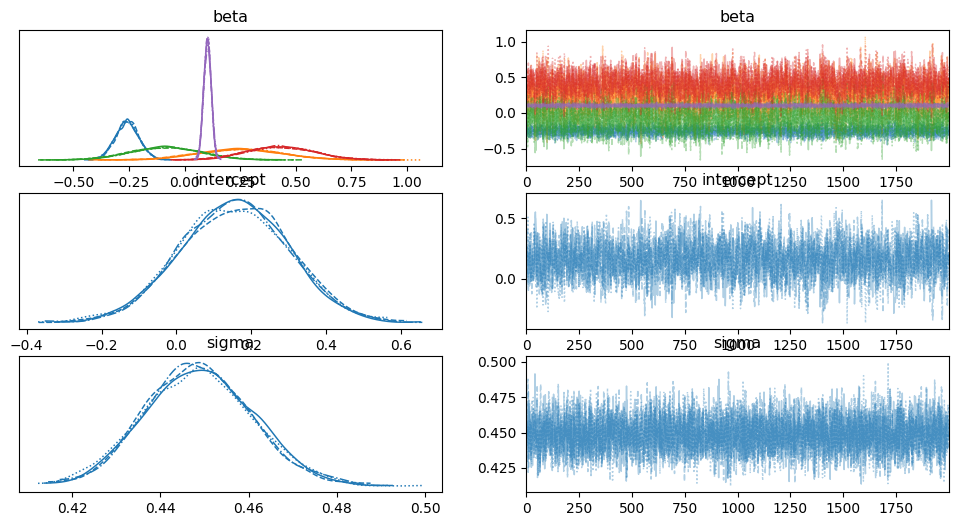

In [41]:
# plotting model data

az.plot_trace(idata)

In [43]:
data_summary = az.summary(idata)

print(data_summary)

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   -0.257  0.053  -0.359   -0.161      0.001    0.001    5999.0   
beta[1]    0.252  0.187  -0.096    0.598      0.004    0.002    2565.0   
beta[2]   -0.083  0.159  -0.396    0.200      0.003    0.002    2299.0   
beta[3]    0.430  0.152   0.130    0.700      0.003    0.002    2091.0   
beta[4]    0.103  0.017   0.072    0.134      0.000    0.000    6434.0   
intercept  0.154  0.145  -0.109    0.428      0.003    0.002    2099.0   
sigma      0.449  0.012   0.426    0.472      0.000    0.000    6376.0   

           ess_tail  r_hat  
beta[0]      4351.0    1.0  
beta[1]      3733.0    1.0  
beta[2]      3371.0    1.0  
beta[3]      2759.0    1.0  
beta[4]      4365.0    1.0  
intercept    2881.0    1.0  
sigma        4728.0    1.0  


In [35]:
beta_samples = trace.get_values("beta", combine = True)
intercept_samples = trace.get_values("intercept", combine = True)
sigma_samples = trace.get_values("sigma", combine = True)

In [36]:
print(beta_samples)

[[-0.23458279  0.1666984  -0.07848049  0.41711128  0.11908662]
 [-0.14934019  0.0602109  -0.0257235   0.39197566  0.08928178]
 [-0.31839485  0.21907569 -0.29237565  0.30132929  0.1034683 ]
 ...
 [-0.25976649  0.39401885 -0.13479494  0.44510425  0.08067677]
 [-0.34327138  0.12257053 -0.18461413  0.3900148   0.09748143]
 [-0.24992991 -0.11883153 -0.45617327  0.05412269  0.0877464 ]]
